### 화질 개선

#### 히스토그램 밝기 조절

In [3]:
import numpy as np
import cv2

def brightness(img, threshold=0):
    height, width = img.shape
    img_ = np.zeros(img.shape, dtype=np.uint8)

    for y in range(height):
        for x in range(width):
            temp = img[y][x] + threshold;
            if (temp > 255):
                img_[y][x] = 255
            elif(temp < 0):
                img_[y][x] = 0
            else:
                img_[y][x] = temp
    return img_

In [4]:
img = cv2.imread("images/couple256.jpg", cv2.IMREAD_GRAYSCALE)
img2 = brightness(img, threshold=100)
cv2.imshow("Image", np.c_[img, img2])
cv2.waitKey()
cv2.destroyAllWindows()

In [6]:
def histogram(img):
    height, width = img.shape
    hist = np.zeros(256)
    for y in range(height):
        for x in range(width):
            hist[img[y,x]] = hist[img[y,x]] + 1
    return hist

(0.0, 256.0)

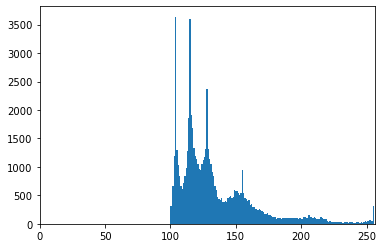

In [7]:
import matplotlib.pyplot as plt

img2 = brightness(img, threshold=100)
plt.bar(x=list(range(256)), height=histogram(img2), width=1)
plt.xlim([0,256])

### 콘트라스트 강조

In [10]:
import numpy as np

def contrast(img, low=0, high=255):
    height, width = img.shape
    img_ = np.zeros(img.shape, dtype=np.uint8)

    for y in range(height):
        for x in range(width):
            temp = (int)((255/(high-low)) * (img[y][x]-low))
            if (temp > 255):
                img_[y][x] = 255
            elif(temp < 0):
                img_[y][x] = 0
            else:
                img_[y][x] = temp
    return img_

In [11]:
img = cv2.imread("images/couple256.jpg", cv2.IMREAD_GRAYSCALE)
img2 = contrast(img, 0, 160)
cv2.imshow("Image", np.c_[img, img2])
cv2.waitKey()
cv2.destroyAllWindows()

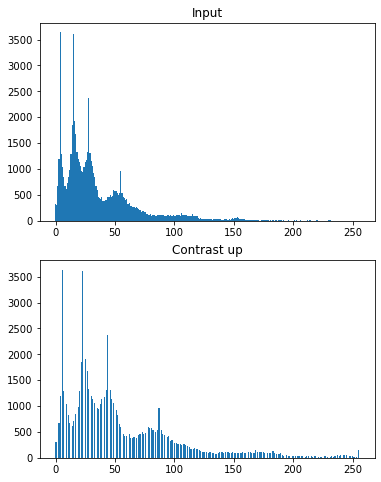

In [12]:
import matplotlib.pyplot as plt
import cv2

img = cv2.imread("images/couple256.jpg", cv2.IMREAD_GRAYSCALE)
img2 = contrast(img, 0, 160)

plt.figure(figsize=(6,8))
plt.subplot(211)
plt.bar(x=range(256), height=histogram(img), width=1)
plt.title("Input")

plt.subplot(212)
plt.bar(x=range(256), height=histogram(img2), width=1)
plt.title("Contrast up")
plt.show()

In [13]:
import cv2

img = cv2.imread("images/couple256.jpg", cv2.IMREAD_GRAYSCALE)
height, width = img.shape
for y in range(height):
    for x in range(width):
        if img[y,x] > 160:
            img[y,x] = 160

img2 = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)
cv2.imshow("Image", np.c_[img, img2])
cv2.waitKey()
cv2.destroyAllWindows()

### 이퀄라이제이션

#### 함수로 구현

In [15]:
import numpy as np

def equalization(img):
    height, width = img.shape
    img_in = img.copy()
    img_out = np.zeros(img_in.shape, dtype=np.uint8)
    histogram = np.zeros(256, dtype=int)
    sum_histo = np.zeros(256, dtype=int)

    for y in range(height):
        for x in range(width):
            histogram[img_in[y,x]] = histogram[img_in[y,x]] + 1

    sum = 0
    scale_factor = 255 / (width * height)
    for i in range(256):
        sum = sum + histogram[i]
        sum_histo[i] = np.ceil(sum*scale_factor)

    for y in range(height):
        for x in range(width):
            img_out[y,x] = sum_histo[img_in[y][x]]

    return img_out

In [22]:
import numpy as np

def scale_nearest(img, scale_x=1, scale_y=1):
    height, width = img.shape
    img_=np.zeros((int(height*scale_y), int(width*scale_x)),
                 dtype=np.uint8)
    for y in range(int(height*scale_y)):
        for x in range(int(width*scale_x)):
            try:
                img_[y,x] = img[round(y/scale_y), round(x/scale_x)]
            except:
                pass
    return img_

In [23]:
import cv2

img = cv2.imread("images/couple256.jpg", cv2.IMREAD_GRAYSCALE)
img2 = equalization(img)
cv2.imshow("Image", np.c_[img, img2])
cv2.waitKey()
cv2.destroyAllWindows()

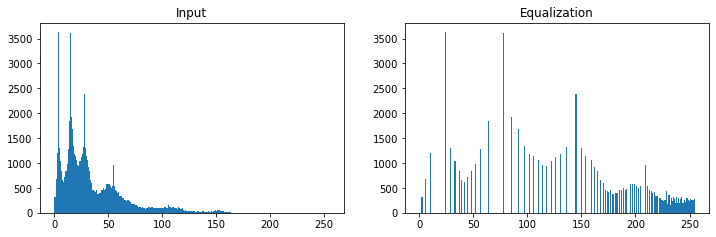

In [17]:
import matplotlib.pyplot as plt
import cv2

img = cv2.imread("images/couple256.jpg", cv2.IMREAD_GRAYSCALE)
img2 = equalization(img)

plt.figure(figsize=(12,3.5))
plt.subplot(121)
plt.bar(x=range(256), height=histogram(img), width=1)
plt.title("Input")
plt.subplot(122)
plt.bar(x=range(256), height=histogram(img2), width=1)
plt.title("Equalization")
plt.show()

#### equalizeHist 사용

In [24]:
import cv2

img = cv2.imread("images/couple256.jpg", cv2.IMREAD_GRAYSCALE)

img2 = cv2.equalizeHist(img)

cv2.imshow("Image", np.c_[img, img2])
cv2.waitKey()
cv2.destroyAllWindows()

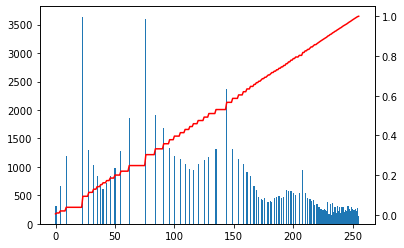

In [25]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("images/couple256.jpg", cv2.IMREAD_GRAYSCALE)
img2 = cv2.equalizeHist(img)

hist = histogram(img2)

cumsum_hist = np.cumsum(hist)
sum_hist = np.sum(hist)
plt.bar(range(256), hist, width=1)
ax = plt.twinx()
ax.plot(range(256), cumsum_hist/sum_hist, 'r')
plt.show()

#### 적응적 히스토그램 이퀄라이제이션

In [26]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("images/tsukuba.png", cv2.IMREAD_GRAYSCALE)

img2 = cv2.equalizeHist(img)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
img3 = clahe.apply(img)

cv2.imshow('Equalization vs. CLAHE', np.c_[img2, img3])
cv2.waitKey()
cv2.destroyAllWindows()

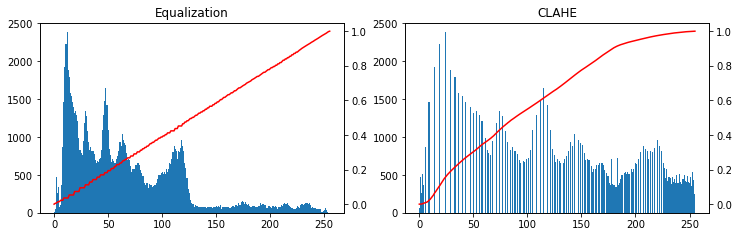

In [27]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
img = cv2.imread("images/tsukuba.png", cv2.IMREAD_GRAYSCALE)

img2 = cv2.equalizeHist(img)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
img3 = clahe.apply(img)

hist1 = histogram(img2)
cumsum_hist1 = np.cumsum(hist1)
sum_hist1 = np.sum(hist1)

hist2 = histogram(img3)
cumsum_hist2 = np.cumsum(hist2)
sum_hist2 = np.sum(hist2)

plt.figure(figsize=(12,3.5))
plt.subplot(121)
plt.bar(x=range(256), height=histogram(img), width=1)
ax = plt.twinx()
ax.plot(range(256), cumsum_hist1/sum_hist1, 'r')
plt.title("Equalization")

plt.subplot(122)
plt.bar(x=range(256), height=histogram(img2), width=1)
ax = plt.twinx()
ax.plot(range(256), cumsum_hist2/sum_hist2, 'r')
plt.title("CLAHE")
plt.show()